In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PyAstronomy import pyasl
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter

df0=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset0.csv', sep=',',  index_col=0)
df1=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset1.csv', sep=',',  index_col=0)
df2=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset2.csv', sep=',',  index_col=0)
df3=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset3.csv', sep=',',  index_col=0)

dataset_df = pd.concat([df0, df1, df2, df3])

In [108]:
y_smooth = np.convolve(dataset_df['cav1_defect'], signal.general_gaussian(3,0.2, 0.5), mode='same')

In [223]:
sig = np.around(np.arange(0.02, 3, 0.02), decimals=2)
(number_of_sigs, ) = sig.shape
(number_of_files, ) = dataset_df['cav1_defect'].shape

In [224]:
smoothed_gaussian = [[0 for x in range(number_of_files)] for y in range(number_of_sigs)]
MSEs_gaussian = [0 for x in range(number_of_sigs)]

In [225]:
for i in range(number_of_sigs):
    smoothed_gaussian[i] = np.convolve(dataset_df['cav1_defect'], signal.gaussian(3,sig[i]), mode='same')
    MSEs_gaussian[i] = mean_squared_error(smoothed_gaussian[i], dataset_df['cav1_defect'])

In [226]:
smoothed_gaussian = np.asarray(smoothed_gaussian).T
MSEs_gaussian = np.asarray(MSEs_gaussian)

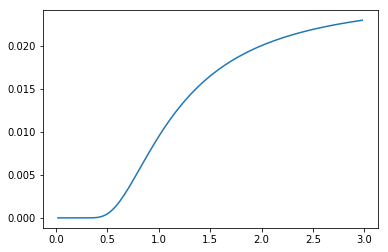

In [227]:
plt.plot(sig, MSEs_gaussian)

(145, 155)

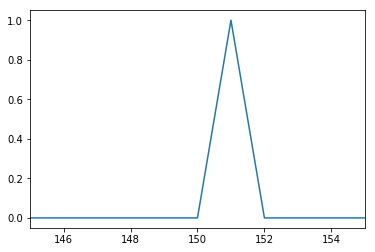

In [244]:
plt.plot(range(107569), dataset_df['cav1_defect'])
plt.xlim([145, 155])

(145, 155)

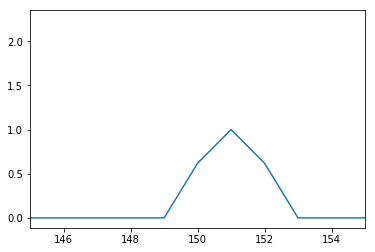

In [252]:
plt.plot(range(107569), smoothed_gaussian[:,50])
plt.xlim([145, 155])

(145, 155)

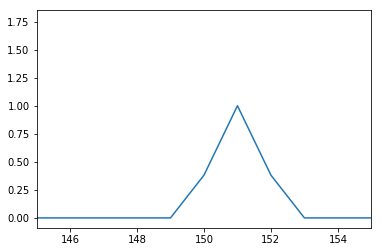

In [246]:
plt.plot(range(107569), smoothed_gaussian[:,35])
plt.xlim([145, 155])

(248, 256)

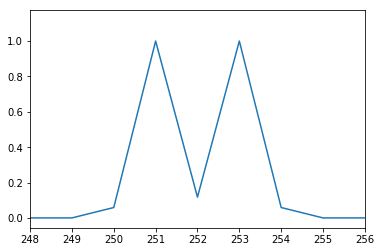

In [231]:
plt.plot(range(107569), smoothed_gaussian[:,20])
plt.xlim([248, 256])

(248, 256)

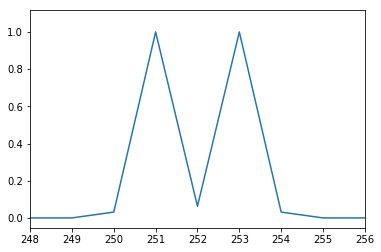

In [232]:
plt.plot(range(107569), smoothed_gaussian[:,18])
plt.xlim([248, 256])

(248, 256)

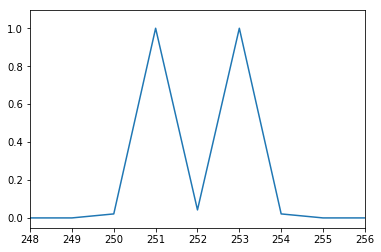

In [233]:
plt.plot(range(107569), smoothed_gaussian[:,17])
plt.xlim([248, 256])

(248, 256)

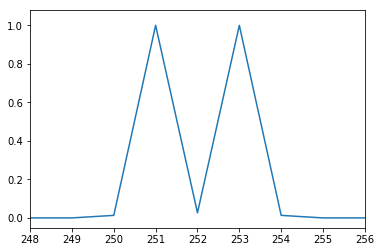

In [234]:
plt.plot(range(107569), smoothed_gaussian[:,16])
plt.xlim([248, 256])

In [247]:
sig[50]

1.02

In [172]:
shap = np.around(np.arange(0.01, 1, 0.01), decimals=2)
(number_of_shaps, ) = shap.shape
(number_of_files, ) = dataset_df['cav1_defect'].shape


smoothed_general_gaussian = [[0 for x in range(number_of_files)] for y in range(number_of_shaps)]
MSEs_general_gaussian = [0 for x in range(number_of_shaps)]
for i in range(number_of_shaps):
    smoothed_general_gaussian[i] = np.convolve(dataset_df['cav1_defect'], signal.general_gaussian(3,sig[17], shap[i]), mode='same')
    MSEs_general_gaussian[i] = mean_squared_error(smoothed_general_gaussian[i], dataset_df['cav1_defect'])
smoothed_general_gaussian = np.asarray(smoothed_general_gaussian).T
MSEs_general_gaussian = np.asarray(MSEs_general_gaussian)

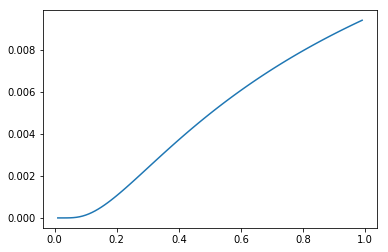

In [173]:
plt.plot(shap, MSEs_general_gaussian)

(225, 300)

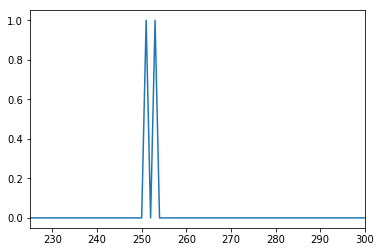

In [174]:
plt.plot(range(107569), dataset_df['cav1_defect'])
plt.xlim([225, 300])

(225, 300)

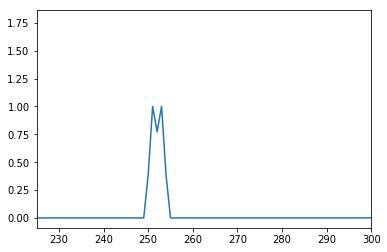

In [176]:
plt.plot(range(107569), smoothed_general_gaussian[:,40])
plt.xlim([225, 300])

(225, 300)

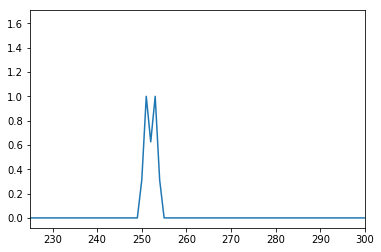

In [177]:
plt.plot(range(107569), smoothed_general_gaussian[:,30])
plt.xlim([225, 300])

(225, 300)

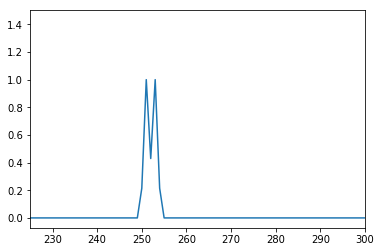

In [178]:
plt.plot(range(107569), smoothed_general_gaussian[:,20])
plt.xlim([225, 300])

(225, 300)

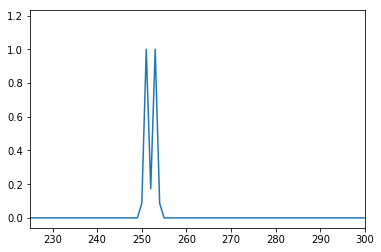

In [182]:
plt.plot(range(107569), smoothed_general_gaussian[:,10])
plt.xlim([225, 300])

(225, 300)

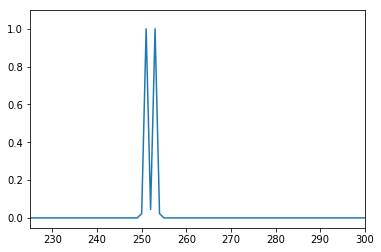

In [183]:
plt.plot(range(107569), smoothed_general_gaussian[:,5])
plt.xlim([225, 300])

(225, 300)

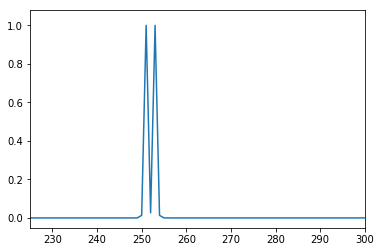

In [185]:
plt.plot(range(107569), smoothed_general_gaussian[:,4])
plt.xlim([225, 300])

In [305]:
diff0 = df0['Shot_no'].diff().ne(1).cumsum()
df0['defect_smoothed'] = df0.groupby(['Cast_date','Shift',diff0])['defect'].apply(lambda x: np.convolve(x, signal.gaussian(3,1.02), mode='same'))

In [321]:
diff0 = df0['Shot_no'].diff().ne(1).cumsum()


In [255]:
df0

,File_No,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,...,Part,Die,Cast_date,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed
0,B1012-278-1AF10005,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,...,B1012-278-1,1,2018-01-15,1,5,0,0,0,0,"[nan, nan, nan]"
1,B1012-278-1AF10006,22.802261,1.165540,-0.969840,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,...,B1012-278-1,1,2018-01-15,1,6,0,0,0,0,"[0.0, 0.0, 0.0]"
2,B1012-278-1AF10007,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,...,B1012-278-1,1,2018-01-15,1,7,0,0,0,0,"[0.0, 0.0, 0.0]"
3,B1012-278-1AF10008,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,...,B1012-278-1,1,2018-01-15,1,8,0,0,0,0,"[0.0, 0.0, 0.0]"
4,B1012-278-1AF10009,24.256344,2.081036,-0.970542,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,...,B1012-278-1,1,2018-01-15,1,9,0,0,0,0,"[0.0, 0.0, 0.0]"
5,B1012-278-1AF10010,24.451166,2.219615,-0.977122,16.582668,-0.917516,0.001678,0.025937,9.019852,0.135056,...,B1012-278-1,1,2018-01-15,1,10,0,0,0,0,"[0.0, 0.0, 0.0]"
6,B1012-278-1AF10011,25.327190,2.288937,-0.979330,17.375237,-0.934043,0.001821,0.029028,8.904948,-0.033287,...,B1012-278-1,1,2018-01-15,1,11,0,0,0,0,"[0.0, 0.0, 0.0]"
7,B1012-278-1AF10012,26.121300,2.630819,-0.970186,17.716516,-0.909404,0.002732,0.034934,8.365232,-0.184044,...,B1012-278-1,1,2018-01-15,1,12,0,0,0,0,"[0.0, 0.0, 0.0]"
8,B1012-278-1AF10013,24.465048,2.394772,-0.977317,17.329178,-0.947928,0.001401,0.024786,8.130345,-0.143087,...,B1012-278-1,1,2018-01-15,1,13,0,0,0,0,"[0.0, 0.0, 0.0]"
9,B1012-278-1AF10014,25.383656,2.601822,-0.974734,17.313204,-0.932106,0.001824,0.030129,8.468645,-0.182594,...,B1012-278-1,1,2018-01-15,1,14,0,0,0,0,"[0.0, 0.0, 0.0]"


In [319]:
df0= df0.drop(['defect_smoothed'], axis=1)

KeyError: "['defect_smoothed'] not found in axis"

In [356]:

grps0 = df0.groupby(['Cast_date','Shift',diff0])['defect'].apply(lambda x: smooth(x))
(nom_of_grps,) = grps0.shape

In [354]:
def smooth(x):
    if len(x)<3:
        return x
    else:
        return np.convolve(x, signal.gaussian(3,1.02), mode='same')
    #return x.mean()

In [338]:
df0.groupby(['Cast_date','Shift',diff0])['defect'].apply(lambda x: smooth(x))


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     1
16     0
17     0
18     0
19     0
20     1
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
168    0
169    0
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
Name: (2018-01-15, 1, 1), Length: 198, dtype: int64
198    0
199    0
200    0
201    0
202    0
203    0
204    0
205    0
206    0
207    0
208    0
209    0
210    1
211    0
212    0
213    0
214    0
215    0
216    0
217    0
218    0
219    0
220    0
221    0
222    1
223    0
224    0
225    0
226    0
227    0
      ..
229    0
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    0
239    0
240    0
241    0
242

Name: (2018-02-16, 1, 175), dtype: int64
23010    0
Name: (2018-02-16, 1, 176), dtype: int64
23011    0
23012    0
Name: (2018-02-16, 1, 177), dtype: int64
23013    0
Name: (2018-02-16, 1, 178), dtype: int64
23014    0
23015    0
23016    0
23017    0
23018    0
23019    0
23020    0
23021    0
23022    0
23023    0
23024    0
23025    0
Name: (2018-02-16, 1, 179), dtype: int64
23026    0
Name: (2018-02-16, 1, 180), dtype: int64
23027    0
Name: (2018-02-16, 1, 181), dtype: int64
23028    0
23029    0
23030    0
23031    0
Name: (2018-02-16, 1, 182), dtype: int64
23032    0
23033    0
23034    0
Name: (2018-02-16, 1, 183), dtype: int64
23035    0
23036    0
23037    0
Name: (2018-02-16, 1, 184), dtype: int64
23038    0
23039    0
Name: (2018-02-16, 1, 185), dtype: int64


Cast_date   Shift  Shot_no
2018-01-15  1      1          0.080808
                   2          0.081967
                   3          0.029070
            2      4          0.017544
                   5          0.081081
                   6          0.000000
                   7          0.000000
                   8          0.040230
                   9          0.044118
2018-01-16  1      10         0.000000
                   11         0.000000
                   12         0.000000
                   13         0.043956
            2      14         0.053333
                   15         0.000000
                   16         0.000000
                   17         0.111111
                   18         0.044776
2018-01-18  1      19         0.072917
                   20         0.051020
                   21         0.020000
            2      22         0.020548
                   23         0.018519
                   24         0.000000
2018-01-19  1      25         0.00000

In [348]:
df0.groupby(['Cast_date','Shift',diff0])['defect'].apply(lambda x: smooth(x))

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

In [332]:
np.convolve(df0['defect'], signal.gaussian(3,1.02), mode='same')

array([0., 0., 0., ..., 0., 0., 0.])

In [358]:
for i in range(nom_of_grps):
    grps0[i] = np.asarray(grps0[i])

defect_smoothed_grped = grps0[0]
for i in range(1, nom_of_grps):
    defect_smoothed_grped = np.concatenate((defect_smoothed_grped, grps0[i]), axis=None)

In [361]:
len(defect_smoothed_grped)

23040

In [362]:
len(df0['defect'])

23040

In [360]:
df0['defect_smoothed'] = defect_smoothed_grped

In [303]:
df0

,File_No,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,...,Part,Die,Cast_date,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed
0,B1012-278-1AF10005,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,...,B1012-278-1,1,2018-01-15,1,5,0,0,0,0,0.000000
1,B1012-278-1AF10006,22.802261,1.165540,-0.969840,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,...,B1012-278-1,1,2018-01-15,1,6,0,0,0,0,0.000000
2,B1012-278-1AF10007,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,...,B1012-278-1,1,2018-01-15,1,7,0,0,0,0,0.000000
3,B1012-278-1AF10008,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,...,B1012-278-1,1,2018-01-15,1,8,0,0,0,0,0.000000
4,B1012-278-1AF10009,24.256344,2.081036,-0.970542,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,...,B1012-278-1,1,2018-01-15,1,9,0,0,0,0,0.000000
5,B1012-278-1AF10010,24.451166,2.219615,-0.977122,16.582668,-0.917516,0.001678,0.025937,9.019852,0.135056,...,B1012-278-1,1,2018-01-15,1,10,0,0,0,0,0.000000
6,B1012-278-1AF10011,25.327190,2.288937,-0.979330,17.375237,-0.934043,0.001821,0.029028,8.904948,-0.033287,...,B1012-278-1,1,2018-01-15,1,11,0,0,0,0,0.000000
7,B1012-278-1AF10012,26.121300,2.630819,-0.970186,17.716516,-0.909404,0.002732,0.034934,8.365232,-0.184044,...,B1012-278-1,1,2018-01-15,1,12,0,0,0,0,0.000000
8,B1012-278-1AF10013,24.465048,2.394772,-0.977317,17.329178,-0.947928,0.001401,0.024786,8.130345,-0.143087,...,B1012-278-1,1,2018-01-15,1,13,0,0,0,0,0.000000
9,B1012-278-1AF10014,25.383656,2.601822,-0.974734,17.313204,-0.932106,0.001824,0.030129,8.468645,-0.182594,...,B1012-278-1,1,2018-01-15,1,14,0,0,0,0,0.000000


In [317]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? z
Once deleted, variables cannot be recovered. Proceed (y/[n])? y
